In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [5]:
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

In [6]:
def f(xs, t, ps):
    """Receptor synthesis-internalization model."""
    try:
        a = ps['a'].value
        b = ps['b'].value
    except:
        a, b = ps
    x = xs

    return a - b*x

In [7]:
def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(ps,))
    return x

In [8]:
def residual(ps, ts, data):
    x0 = ps['x0'].value
    model = g(ts, x0, ps)
    return (model - data).ravel()

In [9]:
a = 2.0
b = 0.5
true_params = [a, b]
x0 = 10.0

t = np.linspace(0, 10, 10)
data = g(t, x0, true_params)
data += np.random.normal(size=data.shape)

In [11]:
# set parameters incluing bounds
params = Parameters()
params.add('x0', value=float(data[0]), min=0, max=100)
params.add('a', value= 1.0, min=0, max=10)
params.add('b', value= 1.0, min=0, max=10)

In [13]:
# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual.reshape(data.shape)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 10
    # variables        = 3
    chi-square         = 7.46257034
    reduced chi-square = 1.06608148
    Akaike info crit   = 3.07314812
    Bayesian info crit = 3.98090340
[[Variables]]
    x0:  10.3765122 +/- 1.02159084 (9.85%) (init = 10.38003)
    a:   3.04856658 +/- 1.42240465 (46.66%) (init = 1)
    b:   0.82280398 +/- 0.32018062 (38.91%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)  =  0.976
    C(x0, b) =  0.348
    C(x0, a) =  0.308


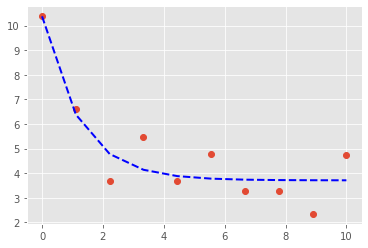

In [14]:
# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '--', linewidth=2, c='blue');

# display fitted statistics
report_fit(result)